# <center><font color='orange'>Diabetes Prediction Project

**Objective:** To create a supervised machine learning model to predict whether a person has diabetes or not using a set of features.

#### Introduction:
Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough — or any — insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

According to WHO about 422 million people worldwide have diabetes. Since diabetes affects a large population across the globe and the collection of these datasets is a continuous process and it comprises of various patient related attributes such as age, gender, symptoms, insulin levels, blood pressure, blood glucose levels, weight etc. We are working on Pima Indians Diabetes Dataset (PIDD), extracted from the University of California, Irvine (UCI) machine learning repository.

#### Feature Description:
1. Pregnancies : Number of times pregnant
2. Glucose: Oral Glucose Tolerance Test result
3. BloodPressure: Diastolic Blood Pressure values in (mm Hg)
4. SkinThickness: Triceps skin fold thickness in (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age in years
9. Outcome: Class 1 indicates person having diabetes and 0 indicates other.

In [1]:
# imported neccessary libraries for preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import sqlalchemy as sl

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes_data.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#checking the outline of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Data Outline:**
   - The dataset has total 768 observations and 8 feature columns and a targe variable 'Outcome'.
   - It has 2 float datatypes and 7 int datatypes feature columns.

In [5]:
#Analyzing the summary of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Insights:**
  - On an average a person had 3 Pregnancies
  - The average glucose level of a person is 120 which is just above the normal level of 70-110. The Maximum glucose level goes upto 199.
  - The average Blood Pressure of a person is 69 which is below than normal level of 80.
  - 50% of the people had skin thickness of 23mm.
  - The average Insulin level of a person is 79 which is beyond the optimum level of 2 to 20 mlU/mL
  - The average age of a person from this data is 33 and the maximum age is 81.

In [6]:
# checking the zeros in each columns and converting it into nulls.
for col in df.columns[:-1]:
    print(f'{col}: {(df[col]==0).sum()}')
    df[col]=np.where(df[col]==0,np.nan,df[col])

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


In [7]:
# checking the number of missing values in each columns
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Exploratory Data Analysis

In [8]:
#changing the style of plot
plt.style.use('ggplot')

In [9]:
#setting the default figure size for all the plots
plt.rcParams['figure.figsize']=[13,6]

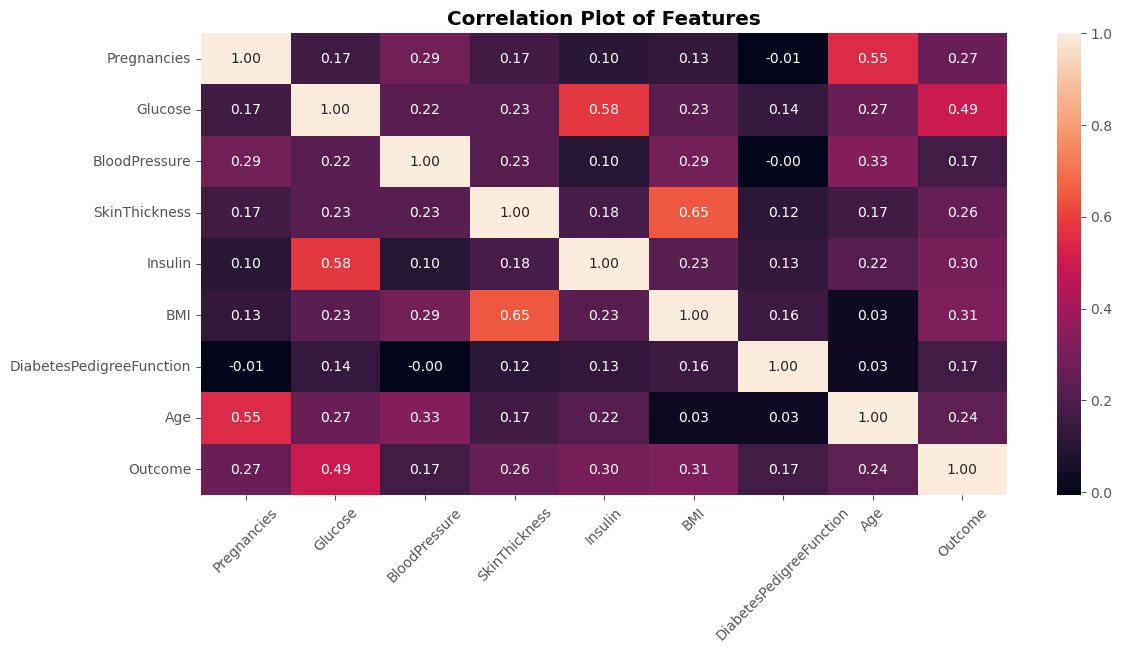

In [10]:
#analyzing the correlation between each feature using heatmap
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.title('Correlation Plot of Features', weight='bold')
plt.xticks(rotation=45)
plt.show()

**Insights:**
 - None of the features have strong correlation with either target or other features.
 - Glucose Level feature has some moderate correlation with target vairable.

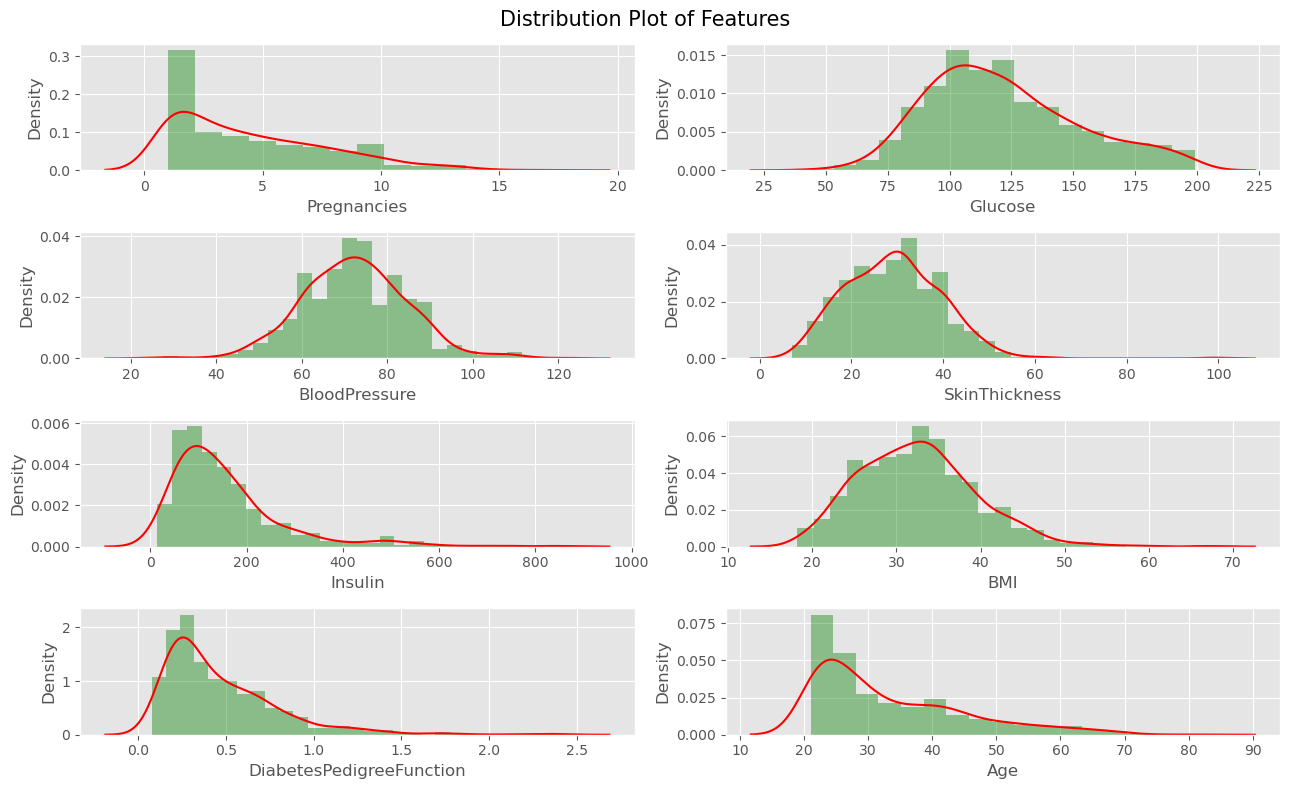

In [11]:
#plotting the distribution plot of each feature
cols=np.array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']).reshape(4,2)

fig,ax=plt.subplots(4,2,figsize=(13,8))
fig.suptitle('Distribution Plot of Features',fontsize=15)
for row in range(4):
    for col in range(2):
        sns.distplot(df[cols[row,col]],ax=ax[row,col],color='green',kde_kws={'color':'red'})
        plt.tight_layout()
plt.show()

Insights:
 - Glucose,BloodPressure, SkinThickness and BMI follows a near normal distribution.
 - Distribution of Pregnancies, Insulin, DPF and Age features are skewed towards right.

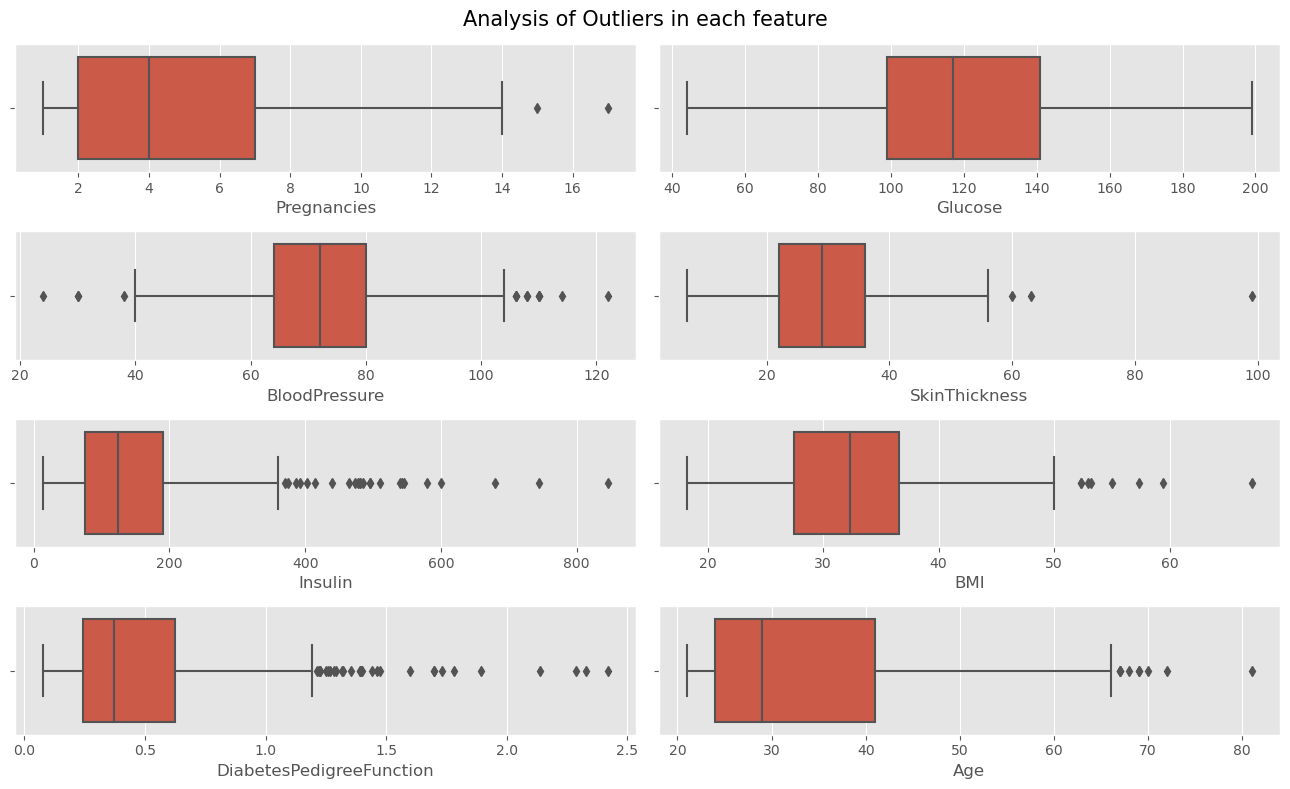

In [12]:
fig,ax=plt.subplots(4,2,figsize=(13,8))
fig.suptitle('Analysis of Outliers in each feature',fontsize=15)
for row in range(4):
    for col in range(2):
        sns.boxplot(x=df[cols[row,col]],ax=ax[row,col])
        plt.tight_layout()
plt.show()

Insights:
 - All the features except glucose level have some outliers in either or both sides.

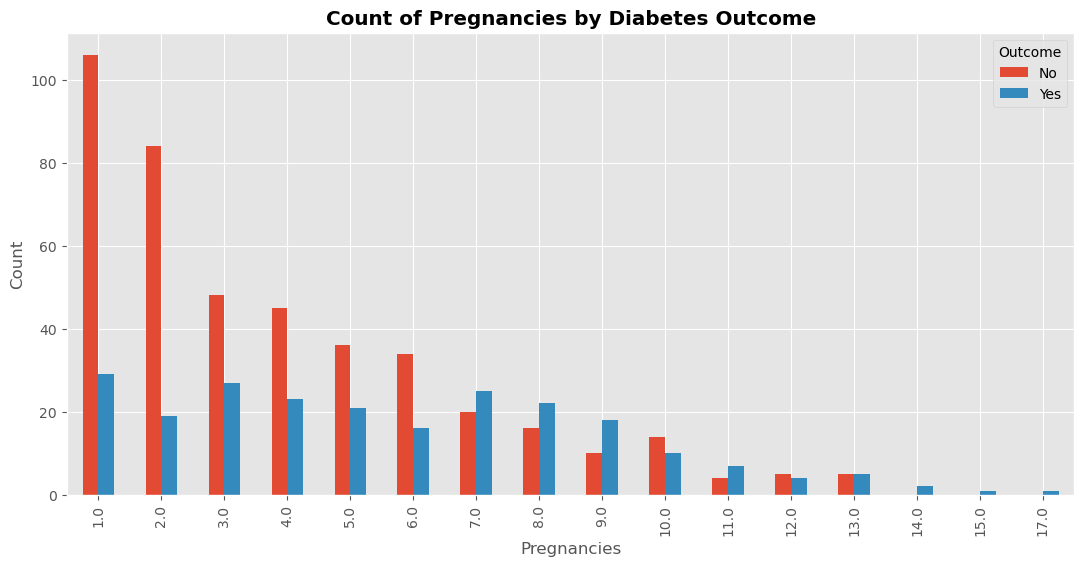

In [13]:
df.groupby(['Pregnancies','Outcome']).size().unstack(level=1).plot(kind='bar')
plt.ylabel('Count')
plt.legend(title='Outcome',labels=['No','Yes'])
plt.title('Count of Pregnancies by Diabetes Outcome',weight='bold')
plt.show()

**Insights:**
 - The changes of having diabetes is less when the number of pregnancies count is less than 2.
 - The possibility of having diabetes increases as the number of pregnancies increases.

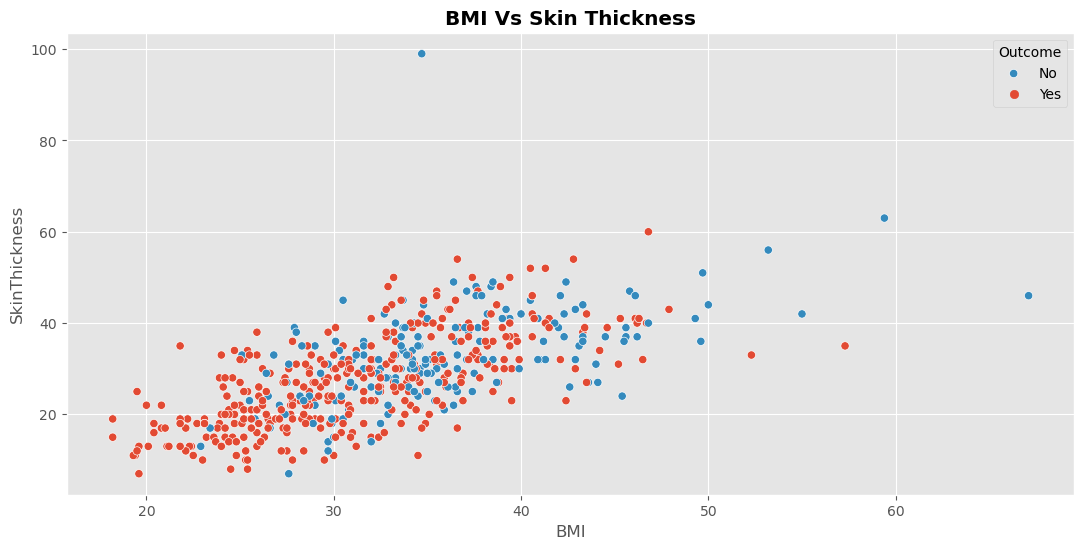

In [14]:
sns.scatterplot(data=df,x='BMI',y='SkinThickness',hue='Outcome')
plt.legend(title='Outcome',labels=['No','Yes'])
plt.title('BMI Vs Skin Thickness',weight='bold')
plt.show()

**Insights:**
 - From the plot we can see that people with less BMI (<30) and skin thickness (<40) are more likely to have the diabetes.

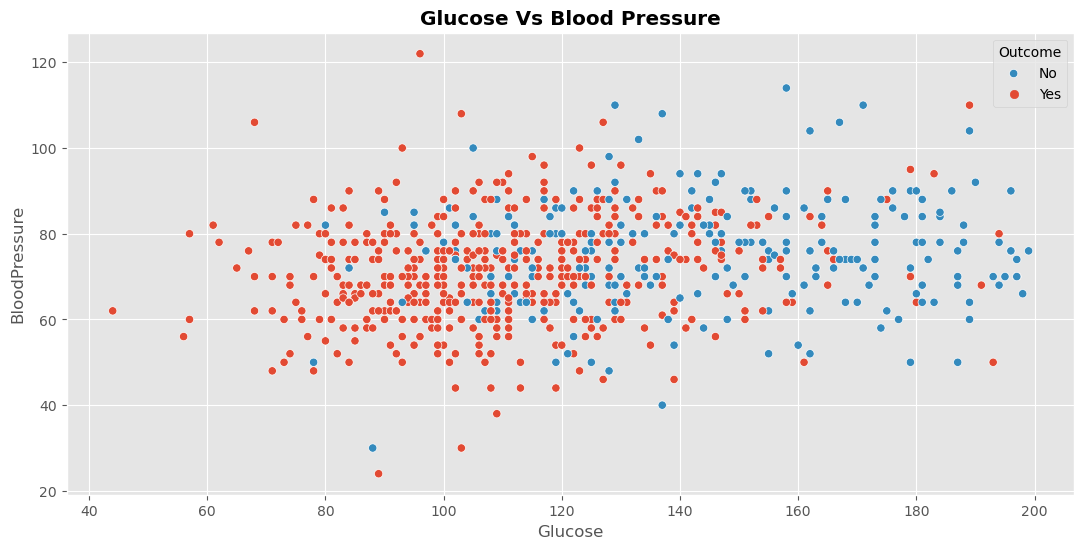

In [15]:
sns.scatterplot(data=df,x='Glucose',y='BloodPressure',hue='Outcome')
plt.legend(title='Outcome',labels=['No','Yes'])
plt.title('Glucose Vs Blood Pressure',weight='bold')
plt.show()

**Insights:**
 - From the plot we can see that people with Glucose level of less than 100 and Blood Pressure less than 80 have higher change to be a diabetic patient.
 - People with Glucose level of greater than 160 less likely to be a diabetes patient.

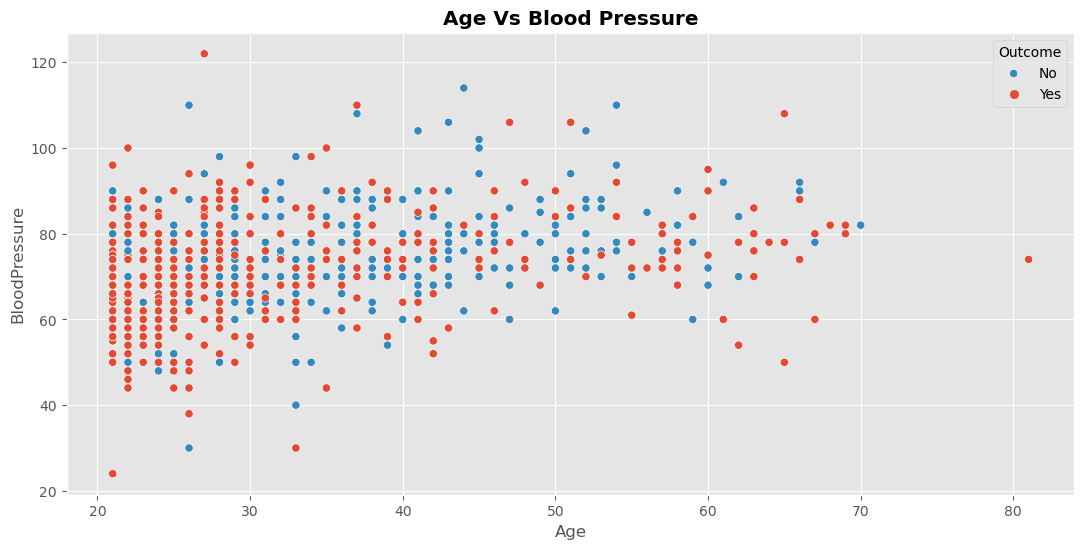

In [16]:
sns.scatterplot(data=df,x='Age',y='BloodPressure',hue='Outcome')
plt.legend(title='Outcome',labels=['No','Yes'])
plt.title('Age Vs Blood Pressure',weight='bold')
plt.show()

**Insights:**
 - From the plot we can see that, the number of Diabetic positve has been concentrated towards left which indicates that people between age 22 to 30 were more susceptable to the diabetes.

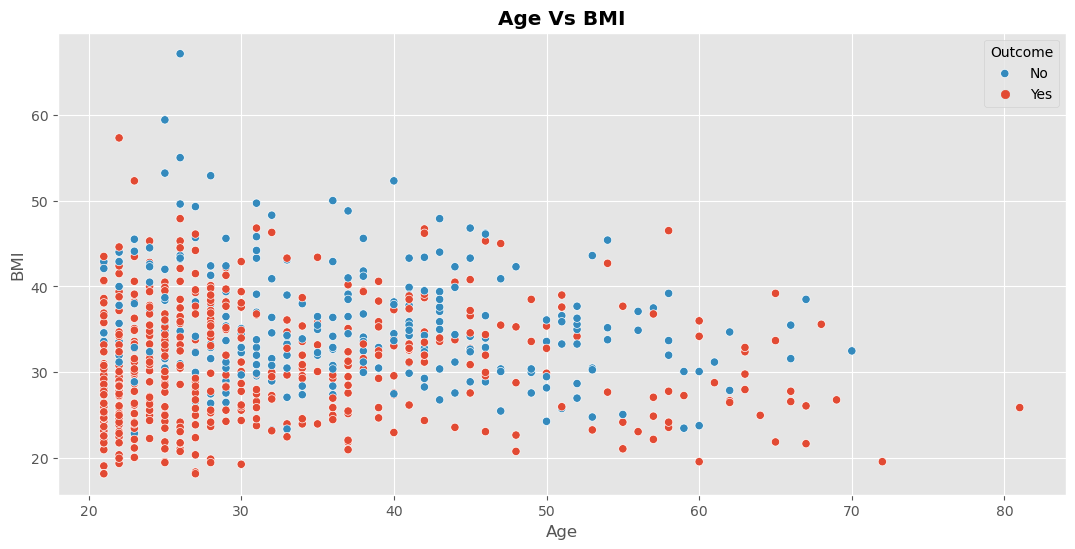

In [17]:
sns.scatterplot(data=df,x='Age',y='BMI',hue='Outcome')
plt.legend(title='Outcome',labels=['No','Yes'])
plt.title('Age Vs BMI',weight='bold')
plt.show()

**Insights:**
 - From the plot we can see that the Diabetes 'Yes' Data points concentrated towards bottom left which implies that the people between 20 to 30 age and having BMI 18 to 30 more likely to have diabetes.

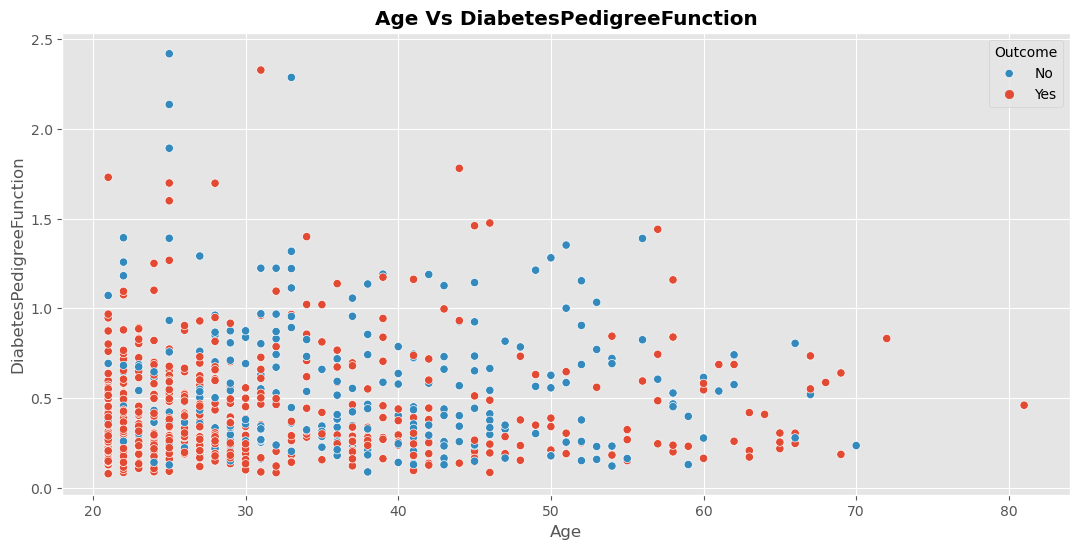

In [18]:
sns.scatterplot(data=df,x='Age',y='DiabetesPedigreeFunction',hue='Outcome')
plt.legend(title='Outcome',labels=['No','Yes'])
plt.title('Age Vs DiabetesPedigreeFunction',weight='bold')
plt.show()

**Insights:**

- From the plot we can see that the Diabetes 'Yes' Data points concentrated towards bottom left which implies that the people between 20 to 30 age and having DPF of <1 more likely to have diabetes.

### Missing values Imputation

In [19]:
#creating a copy of the original dataframe
df_impute=df.copy(deep=True)

In [20]:
#splitting the dataframe into two, one for diabetes 'No' and one for diabetes 'Yes'
df_impute0=df_impute[df_impute['Outcome']==0]
df_impute1=df_impute[df_impute['Outcome']==1]

In [21]:
df_impute0.shape

(500, 9)

In [22]:
df_impute1.shape

(268, 9)

In [23]:
#filling the missing values in each feature with the median value of both the dataframes
for col in df.columns[:-1]:
    df_impute0[col].fillna(df_impute0[col].median(),inplace=True)
    df_impute1[col].fillna(df_impute1[col].median(),inplace=True)

In [24]:
# combining the two imputed dataframes into one
df_impute=pd.concat([df_impute0,df_impute1]).reset_index()

In [25]:
#checking for null values after imputation for validation purpose
df_impute.isnull().sum()

index                       0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Outlier Treatment

In [26]:
#function to cap the outliers in the feature columns
def cap(dataframe,col):
    q1=dataframe[col].quantile(0.25)
    q3=dataframe[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    return dataframe[col].clip(lower,upper)

In [27]:
#capping each columns in the dataframe
for col in df_impute.columns[:-1]:
    df_impute[col]=cap(df_impute,col)

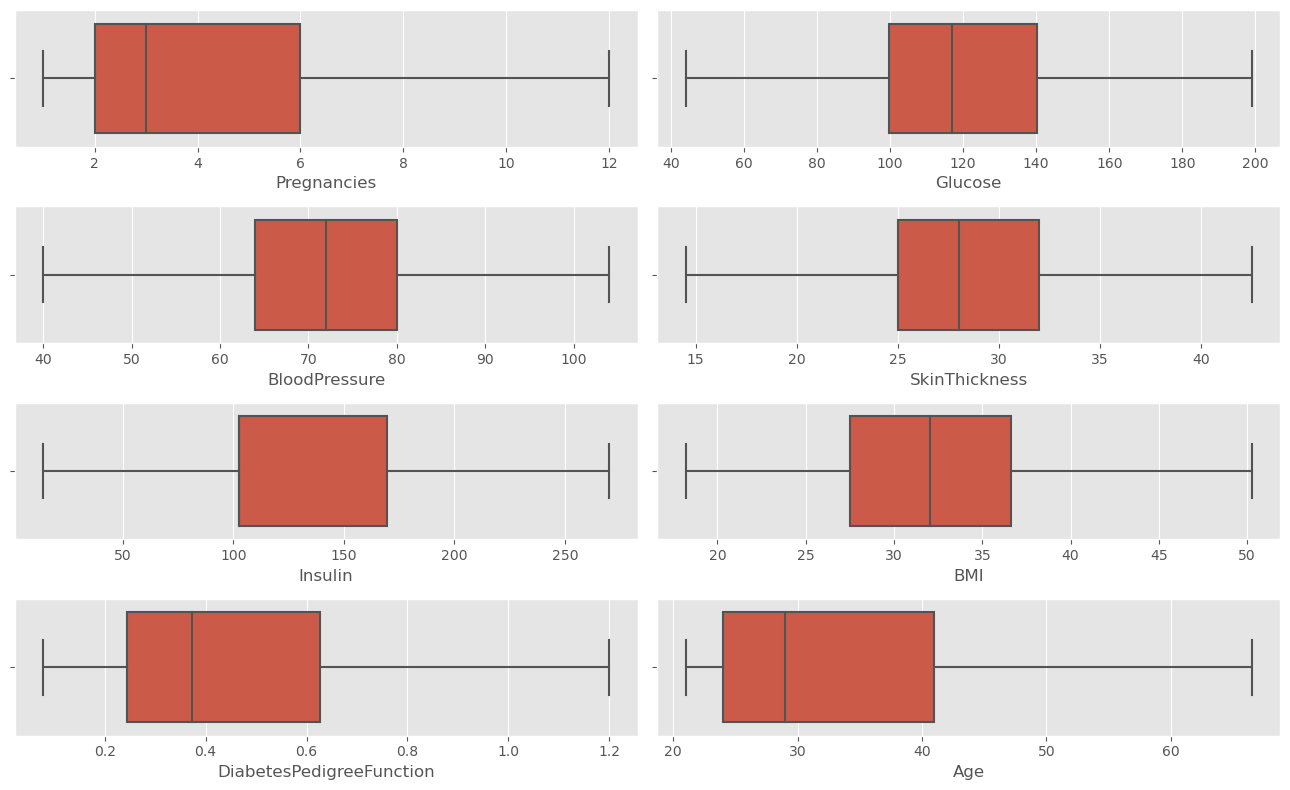

In [28]:
#checking the outliers in the feature columns using box plot
fig,ax=plt.subplots(4,2,figsize=(13,8))
for row in range(4):
    for col in range(2):
        sns.boxplot(x=df_impute[cols[row,col]],ax=ax[row,col])
        plt.tight_layout()

In [29]:
df_impute.drop('index',axis=1,inplace=True)

In [30]:
#Defining the X and Y, Features and target variables respectively
X=df_impute.drop(['Outcome'],axis=1)
y=df_impute['Outcome']

In [31]:
#importing neccesary modules to split the data into train and test and standardize the data.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [32]:
#splitting the data into train and test for training and validation purpose.
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

### Feature Selection

In [33]:
#importing multiple modules to select most relevant features for prediction
from sklearn.feature_selection import mutual_info_classif,f_classif,SelectKBest

In [34]:
#using mutual info classifier to know the amount information gained from each feature
mic=mutual_info_classif(X_train,Y_train,n_neighbors=4,random_state=33)

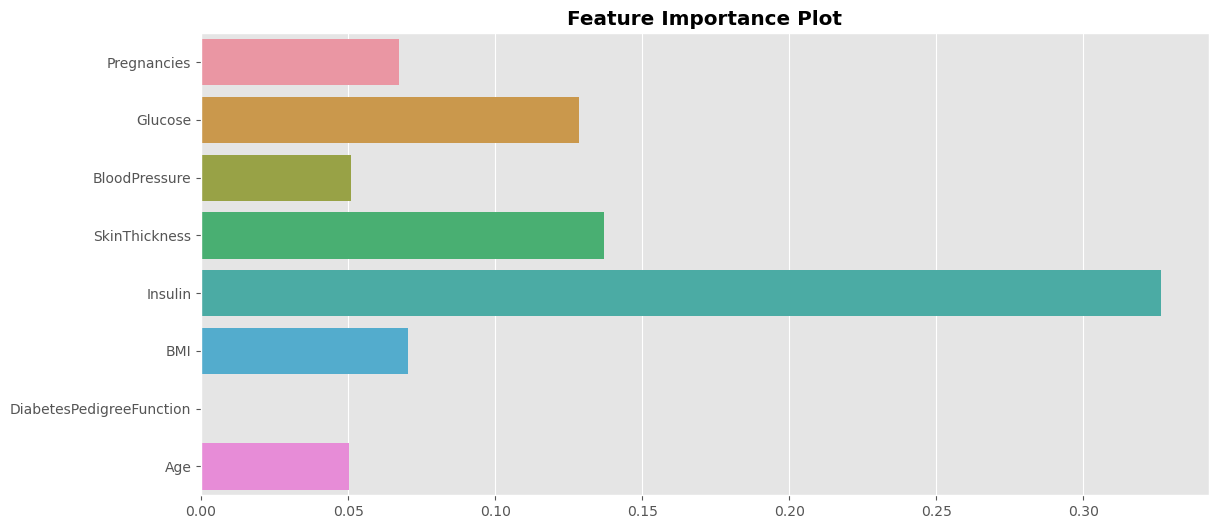

In [35]:
#plotting the feature importance score to select the important features
sns.barplot(y=X_train.columns,x=mic)
plt.title('Feature Importance Plot',weight='bold')
plt.show()

**Insights:**
 - Seems like, Diabetes Pedigree Function has nearly zero mutual information score. It shows that Genetic factor Indicators have less importance in predicting the diabetes. In order to confirm the same, we can perform other feature selection methods to find the importance of features.

In [36]:
#calculating p values for each feature
_,p=f_classif(X_train,Y_train)

In [37]:
p

array([7.50437186e-14, 7.67117911e-40, 2.97268186e-06, 7.67918601e-14,
       2.26456600e-44, 8.09637107e-16, 7.98219247e-05, 2.57730012e-09])

Interpretation:
 - All the features have p-value less 0.05 which implies null hypothesis can be rejected and all the features have some importance in predicting the outcome

In [38]:
rfe=SelectKBest(k=7)

In [39]:
rfe.fit(X_train,Y_train)

SelectKBest(k=7)

In [40]:
rfe.scores_

array([ 58.80044174, 204.14027544,  22.27439723,  58.75049073,
       232.8081512 ,  68.71410755,  15.78929643,  36.63183122])

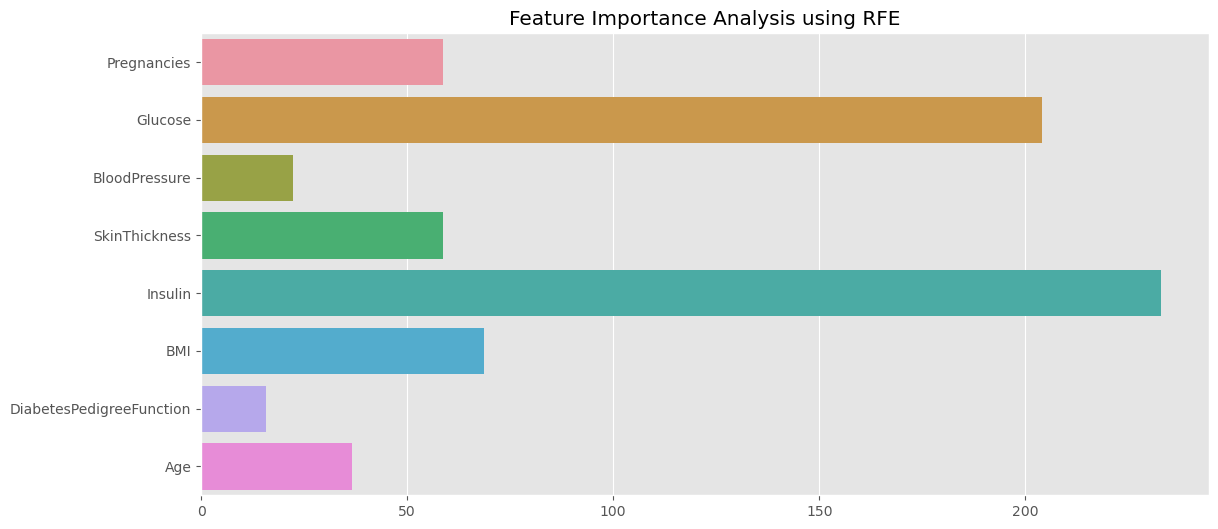

In [41]:
sns.barplot(y=X_train.columns,x=rfe.scores_)
plt.title('Feature Importance Analysis using RFE')
plt.show()

**Insights:**
 - Recursive Feature Elimination method also tells that the Diabetes Pedigree Function have relatively less importance than other features. Hence, we can drop the DiabetesPedigree Function from Train and Test data.

In [42]:
#dropping the DPF feature from the train and test data
X_train.drop(columns=['DiabetesPedigreeFunction'],inplace=True)
X_test.drop(columns=['DiabetesPedigreeFunction'],inplace=True)

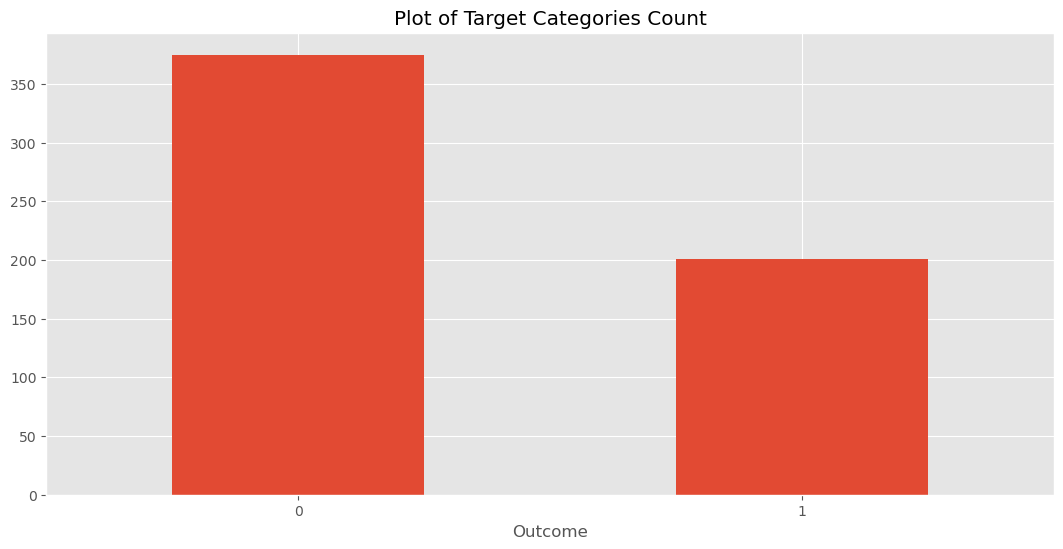

In [43]:
Y_train.value_counts().plot(kind='bar',rot=0)
plt.title('Plot of Target Categories Count')
plt.show()

Interpretation:
 - Diabetes No has more data points compare to Diabetes Yes. Creating Model with data as such may introduce bias in the prediction towards Diabetes No side. Hence, we can need to balance the data points using Over sampling techniques. 

In [44]:
#importing smote method to balance the data
from imblearn.over_sampling import SMOTE

In [45]:
sm=SMOTE()

In [46]:
X_train,Y_train=sm.fit_resample(X_train,Y_train)

In [47]:
st=StandardScaler()
X_train=st.fit_transform(X_train)

In [48]:
X_test=st.transform(X_test)

### Model Building

In [49]:
from sklearn.model_selection import GridSearchCV

def parameter_tuning(model,param,data_x,data_y):

    gsv=GridSearchCV(model,param_grid=param,scoring='recall',verbose=3)

    gsv.fit(data_x,data_y)
    print(gsv.best_score_)
    return gsv.best_estimator_,gsv.best_params_

In [50]:
from xgboost import XGBClassifier

# importing different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### <center><font color='orange'>Model 1: Logistic Regression

In [51]:
lgv=LogisticRegression(C=1e-5)

In [52]:
# param_grid=dict(penalty=['l1','l2'],C=[1e-5,1e-2,0.5,1,10,100],max_iter=list(range(100,1000,100)))
# parameter_tuning(lgv,param_grid,X_train,Y_train)

### <center><font color='orange'>Model 2: RandomForest Classifier

In [53]:
rfc=RandomForestClassifier(max_depth=6,oob_score=True)

In [54]:
# param_grid=dict(n_estimators=[50,100,200,300,400,500],max_depth=[2,3,4,5,6])
# parameter_tuning(rfc,param_grid,X_train,Y_train)

In [55]:
from sklearn.metrics import classification_report,RocCurveDisplay,ConfusionMatrixDisplay,confusion_matrix

In [56]:
from sklearn.metrics import roc_auc_score,roc_curve

### <center><font color='orange'>Model 3: K-Neighbors Classifier

In [57]:
knn=KNeighborsClassifier(n_neighbors=3)

In [58]:
# param_grid=dict(n_neighbors=list(range(2,5)))
# parameter_tuning(knn,param_grid,X_train,Y_train)

### <center><font color='orange'>Model 4: XGBoost Classifier

In [59]:
xgb=XGBClassifier(**{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 50, 'reg_alpha': 1})

In [60]:
# param_grid=dict(n_estimators=[50,100,200,300,400,500],max_depth=[2,3,4,5,6],learning_rate=[1e-3,1e-2,5e-2,0.1,0.5,1],reg_alpha=[0.05,0.1,0.5,1,10,100])
# parameter_tuning(xgb,param_grid,X_train,Y_train)

### <center><font color='orange'>Model 5: SVM Classifier

In [61]:
svc=SVC(C=1e-05, gamma=1,probability=True)

In [62]:
# param_grid=dict(C=[1e-5,1e-3,1e-1,1,10,100],gamma=[1e-5,1e-3,1e-1,1,10,100])
# parameter_tuning(svc,param_grid,X_train,Y_train)

### <center><font color='orange'>Model 6: Decision Tree Classifier

In [63]:
dt=DecisionTreeClassifier(max_depth=2)

In [64]:
# param_grid=dict(max_depth=[2,3,4,5,6,7])
# parameter_tuning(dt,param_grid,X_train,Y_train)

### Performance Evaluation

In [65]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,RocCurveDisplay
from sklearn.model_selection import cross_val_score
perf=pd.DataFrame()
models={'Logistic Regression':lgv,'Random Forest':rfc,'K-Neighbors':knn,'XGBoost':xgb,'SVM':svc,'Decision Tree':dt}

for name,model in models.items():
    model.fit(X_train,Y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    
    accuracy_train=accuracy_score(Y_train,y_pred_train)
    precision_train=precision_score(Y_train,y_pred_train)
    recall_train=recall_score(Y_train,y_pred_train)
    f1_train=f1_score(Y_train,y_pred_train)
    
    accuracy_test=accuracy_score(Y_test,y_pred_test)
    precision_test=precision_score(Y_test,y_pred_test)
    recall_test=recall_score(Y_test,y_pred_test)
    f1_test=f1_score(Y_test,y_pred_test)
    
    print(f'\033[1m\033[95m{name}:\033[0m')
    print('-'*80)
    print('\033[1mTrain Data\t\t\t\t\tTest Data\033[0m')
    print('='*80)
    print(f'Accuracy :  {accuracy_train:.2f}',end='')
    print(f'Accuracy :  {accuracy_test:.2f}'.rjust(48))
    
    print(f'Precision : {precision_train:.2f}',end='')
    print(f'Precision : {precision_test:.2f}'.rjust(48))
    
    print(f'Recall :    {recall_train:.2f}',end='')
    print(f'Recall :    {recall_test:.2f}'.rjust(48))
    
    print(f'F1-score :  {f1_train:.2f}',end='')
    print(f'F1-score :  {f1_test:.2f}'.rjust(48))
    print()
    cvs=cross_val_score(model,X_train,Y_train,scoring='recall')
    perf.loc[name,'recall_train']=recall_train
    perf.loc[name,'recall_test']=recall_test
    perf.loc[name,'cross_val_score']=cvs.mean().round(2)

Logistic Regression:
--------------------------------------------------------------------------------
Train Data					Test Data
Accuracy :  0.80                                Accuracy :  0.79
Precision : 0.79                                Precision : 0.66
Recall :    0.82                                Recall :    0.85
F1-score :  0.81                                F1-score :  0.74

Random Forest:
--------------------------------------------------------------------------------
Train Data					Test Data
Accuracy :  0.97                                Accuracy :  0.88
Precision : 0.95                                Precision : 0.79
Recall :    0.98                                Recall :    0.87
F1-score :  0.97                                F1-score :  0.83

K-Neighbors:
--------------------------------------------------------------------------------
Train Data					Test Data
Accuracy :  0.94                                Accuracy :  0.83
Precision : 0.90                              

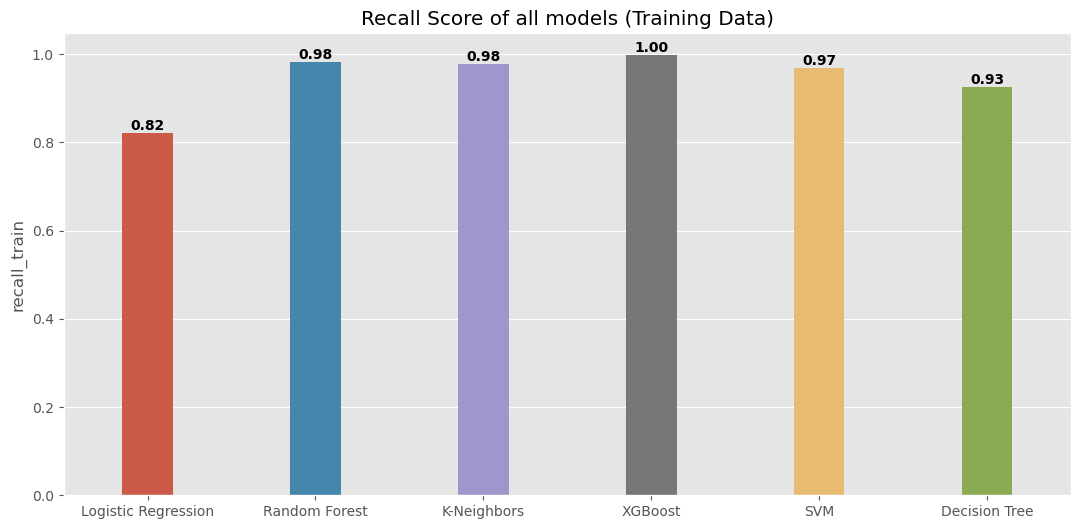

In [66]:
ax=sns.barplot(data=perf,x=perf.index,y='recall_train',width=0.3)
ax.bar_label(ax.containers[0],fmt='%.2f',weight='bold')
ax.set_title('Recall Score of all models (Training Data)')
plt.show()

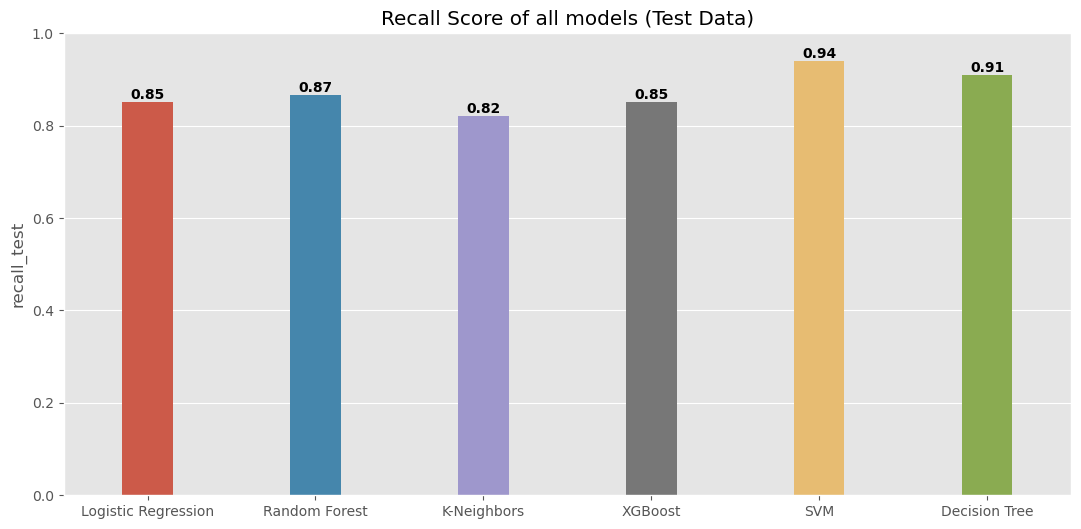

In [67]:
ax=sns.barplot(data=perf,x=perf.index,y='recall_test',width=0.3)
ax.bar_label(ax.containers[0],fmt='%.2f',weight='bold')
ax.set_ylim(0,1)
ax.set_title('Recall Score of all models (Test Data)')
plt.show()

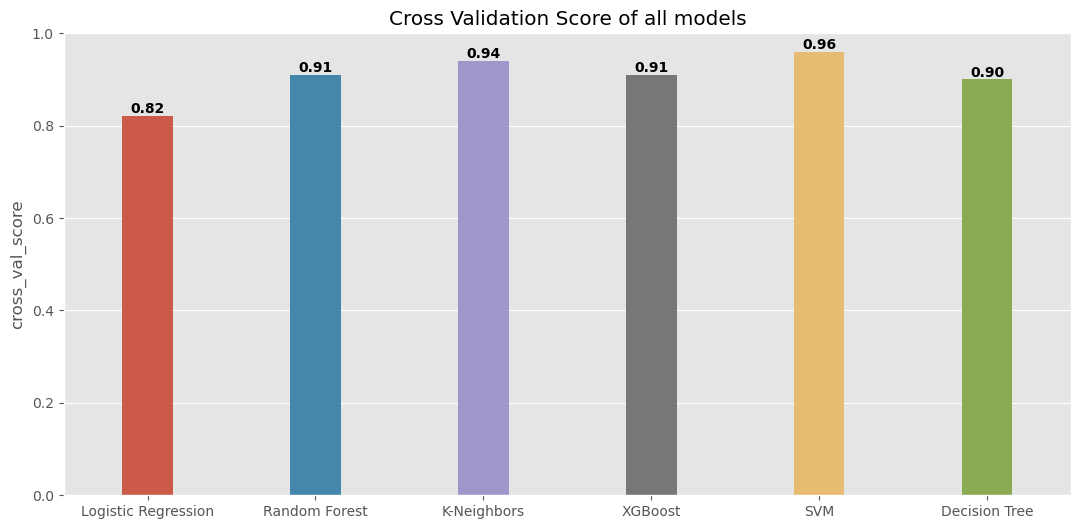

In [68]:
ax=sns.barplot(data=perf,x=perf.index,y='cross_val_score',width=0.3)
ax.bar_label(ax.containers[0],fmt='%.2f',weight='bold')
ax.set_ylim(0,1)
ax.set_title('Cross Validation Score of all models')
plt.show()

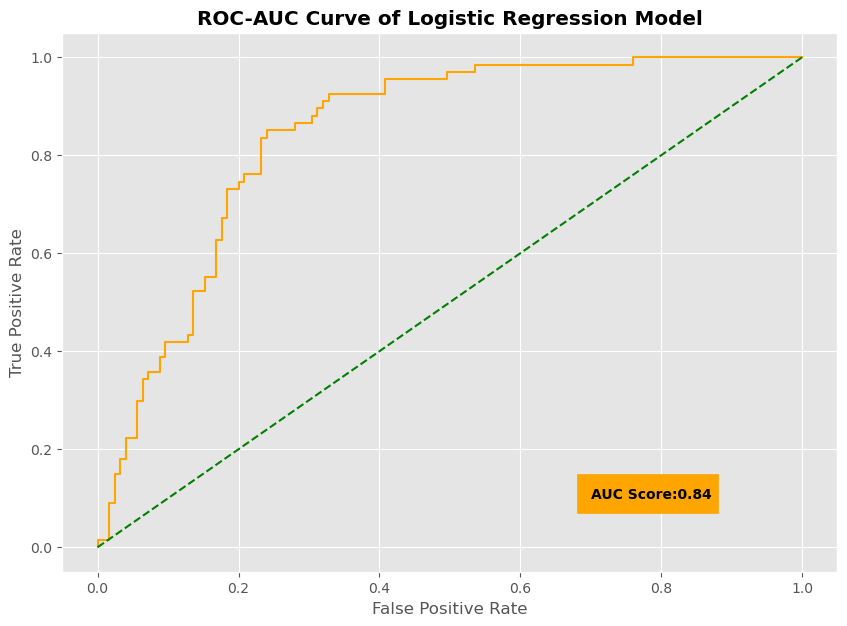

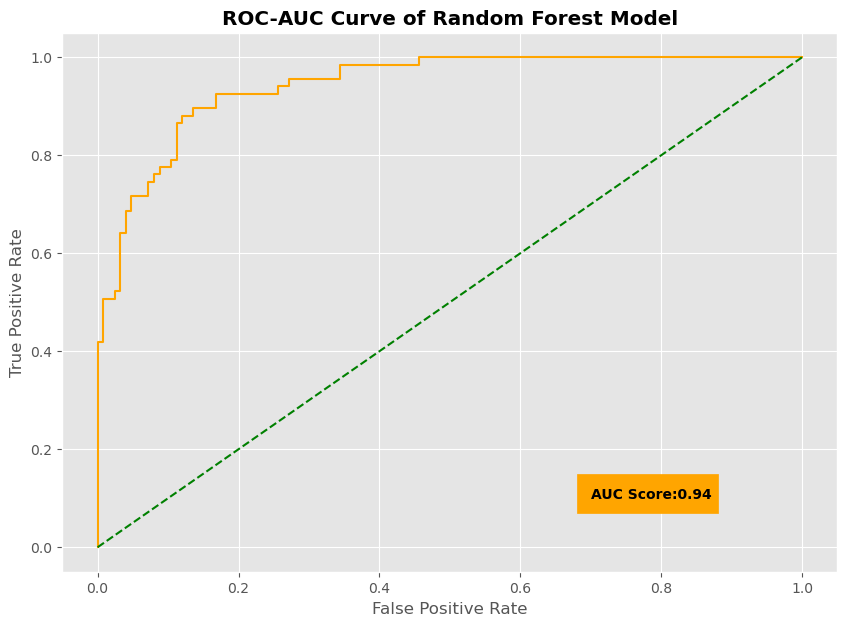

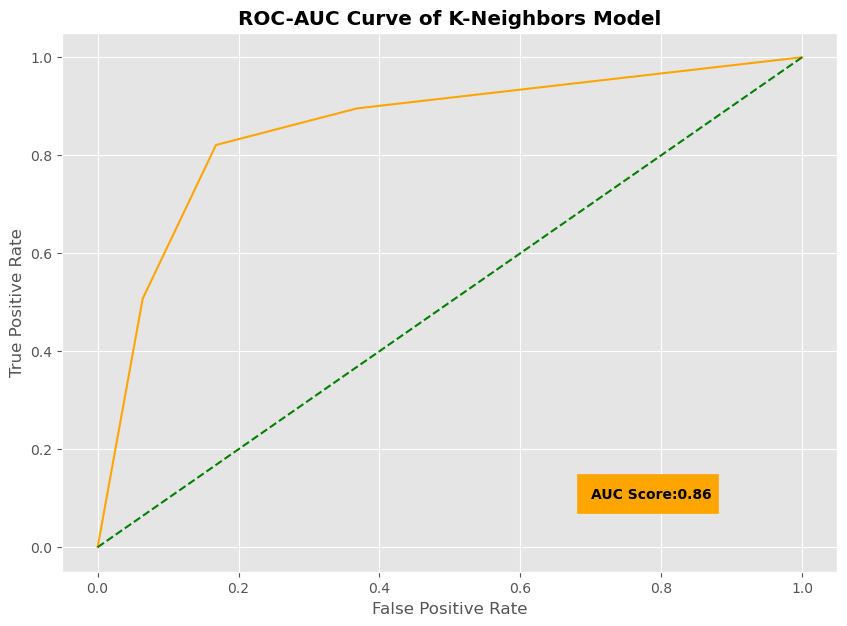

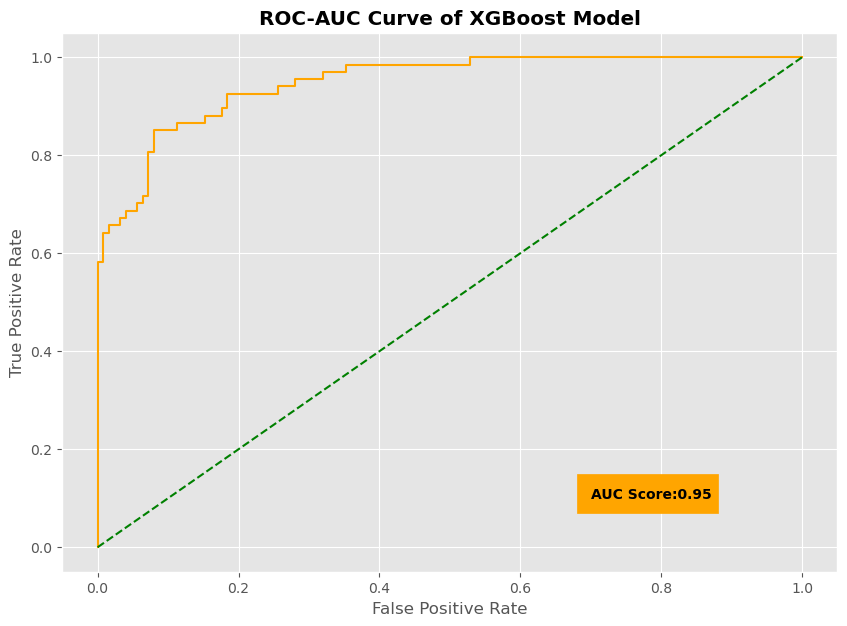

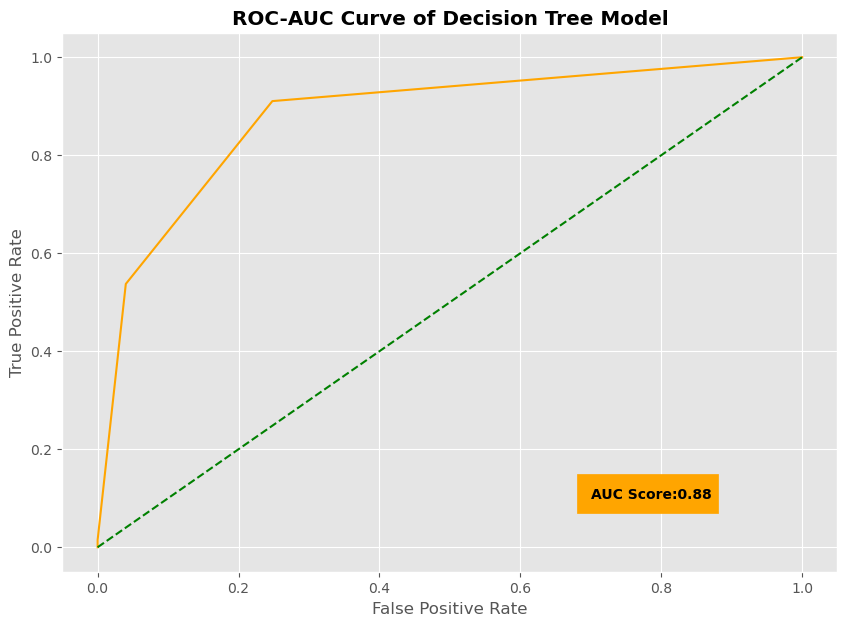

In [69]:
for name,model in models.items():
    #Plotting the roc-auc curve
    pred_prob1=model.predict_proba(X_test)[:,1]
    fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1, pos_label=1,drop_intermediate=False)
    auc_score1 = roc_auc_score(Y_test, pred_prob1)

    from matplotlib.patches import Rectangle
    if name=='SVM':
        continue
    fig,ax=plt.subplots(figsize=(10,7))
    ax.plot(fpr1,tpr1,c='orange')
    ax.plot([0,1],[0,1],'g--')
    ax.add_patch(Rectangle((0.68,0.07),0.2,0.08,color='orange',edgecolor='green',fill=True))
    ax.text(0.7,0.1,f'AUC Score:{auc_score1:.2f}',color='black',weight='bold')
    ax.set_title(f'ROC-AUC Curve of {name} Model',weight='bold')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    plt.show()

In [70]:
svm_cvs=perf.loc['SVM','cross_val_score']

### Summary:

   - Imported the necessary modules for the project and checked the outline of the data.
   - Performed exploratory analysis to **visualize the distribution of the different features and to identify the relationship between multiple features.**
   - Performed preprocessing steps to **treat the missing values and Outliers**
   - Used multiple feature selection techniques to find the most important features from the available features.
   - Used **SMOTE over sampling method** to treat the **imbalance nature of the dataset.**
   - Used <font color='green'>**6 Models (Logistic Regression, KNN, Random Forest, XGBoost, Decision Tree and SVM)**</font> to find the best model for predicting the Diabetes Outcome.
   - Evauleted the performance of the various models using **Accuracy, Precision, Recall and F1-Score.**
   - Based on the Performance Evaluation, it was found that **SVM Classifier.** performed well in predicting the Diabetes Outcome.
   - Based on the activities performed, concluding that <font color='green'>**SVM is the best model for predicting (Average Recall Score - 96% ) the Diabetes Outcome as an individual model.**